# 🛍️ Mall Customer Segmentation Using CRISP-DM


This notebook walks through the CRISP-DM process (Cross-Industry Standard Process for Data Mining) using a mall customer dataset.  
The business goal is to perform customer segmentation to inform targeted marketing strategies.


## 1. 📘 Business Understanding


**Goal:** Understand the business problem and define objectives.

**Scenario:**  
A mall wants to enhance its marketing strategy by identifying different customer groups.  
Customer segmentation can help in targeting customers more effectively by tailoring promotions, product offerings, and services.

**Data Science Objective:**  
Use clustering techniques to group similar customers based on features such as age, income, and spending score.


In [96]:
import os
import warnings

# Fix for KMeans MKL memory leak on Windows
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore")

## 2. 📊 Data Understanding

In [97]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"./../data/Mall_Customers.csv")

# Preview data
df.head()


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [99]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.00000
mean,100.500000,38.895000,60.505000,49.92500
std,57.879185,14.075317,26.114937,25.76526
min,1.000000,18.000000,15.000000,1.00000
25%,50.750000,28.000000,41.500000,33.50000
50%,100.500000,36.000000,61.500000,50.00000
75%,150.250000,49.000000,78.000000,72.25000
max,200.000000,70.000000,137.000000,99.00000


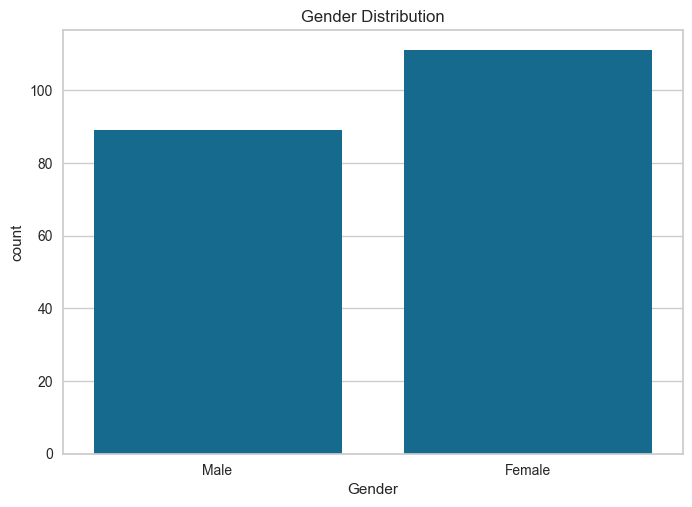

In [100]:

import seaborn as sns
import matplotlib.pyplot as plt

# GenderCode distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


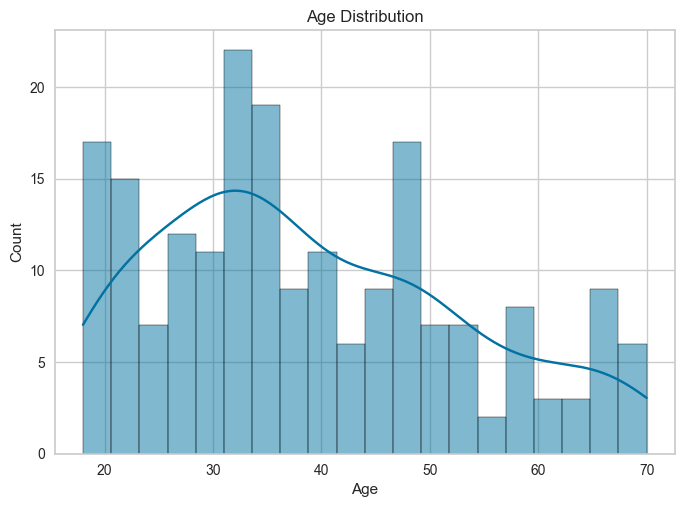

In [101]:

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


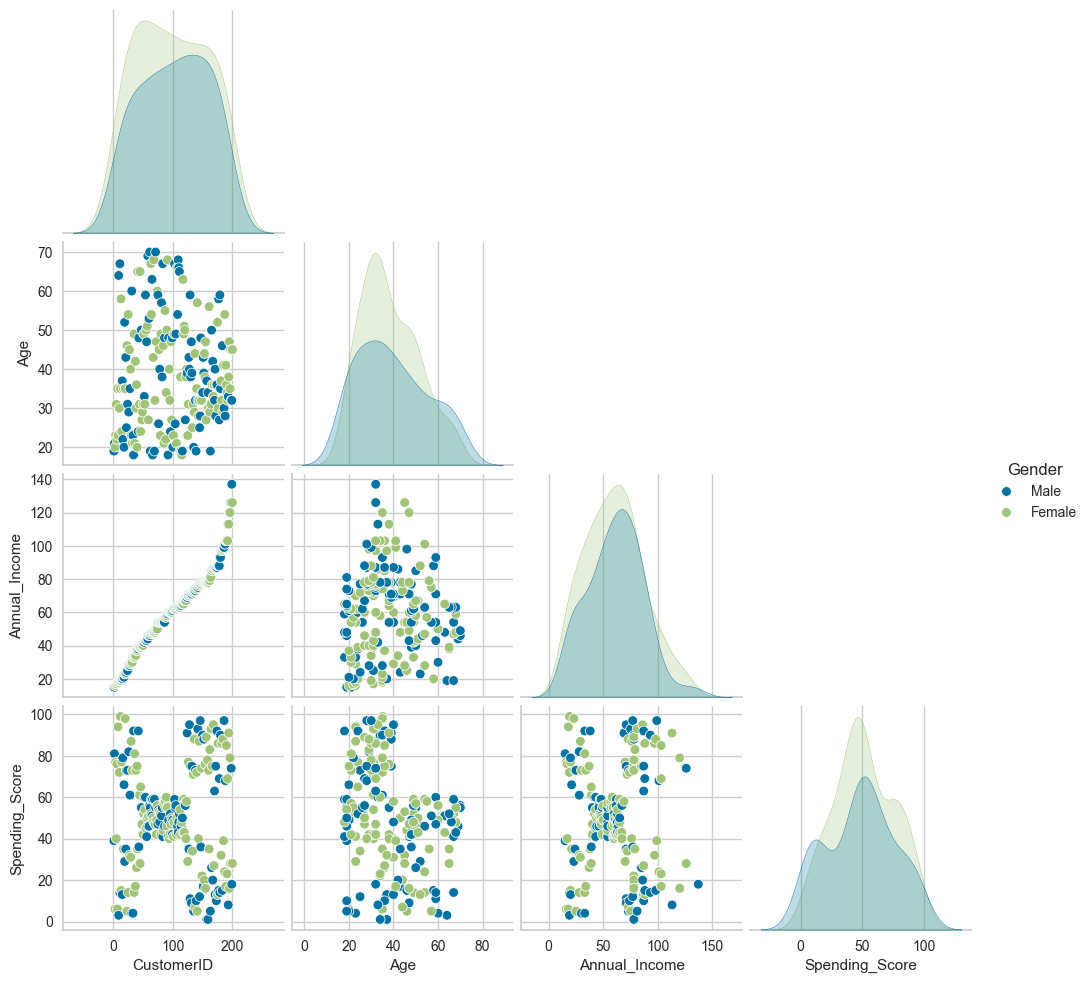

In [102]:
sns.pairplot(data=df, kind='scatter', corner=True, hue='Gender')

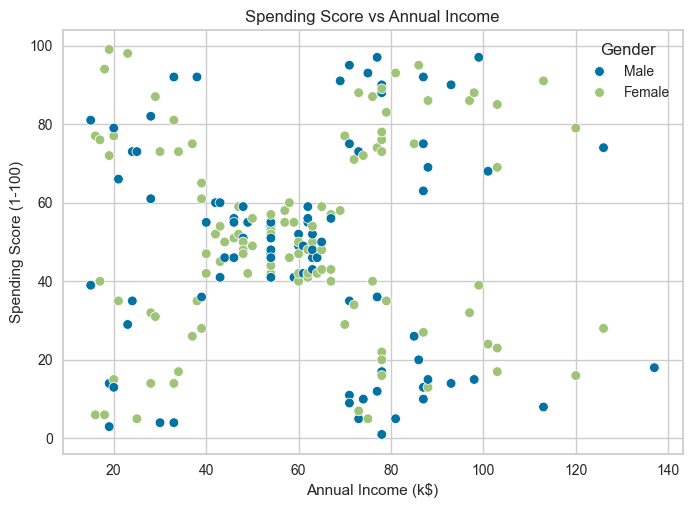

In [103]:

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Spending Score vs Annual Income, colored by Gender
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Gender')
plt.title("Spending Score vs Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()



## 3. 🧹 Data Preparation


**Goal:** Clean and transform data into a format suitable for modeling.


In [104]:
gender_map = {g:n for n, g in enumerate(df['Gender'].unique())}

df['GenderCode'] = df['Gender'].map(gender_map)
df.drop(columns='Gender', inplace=True)
df.drop(columns='CustomerID', inplace=True)
df.head()

,Age,Annual_Income,Spending_Score,GenderCode
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


## 4. 🤖 Modeling


**Goal:** Apply clustering algorithm to group customers.

We'll use KMeans clustering and determine the optimal number of clusters using the Elbow Method.


In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [106]:
# Select features
features = df[['Age', 'Annual_Income', 'Spending_Score']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

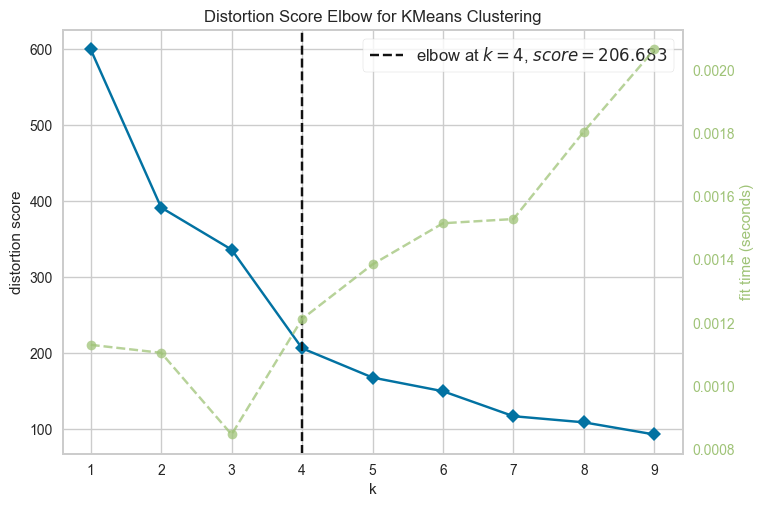

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_features)
visualizer.poof()

In [ ]:

# Apply KMeans with 5 clusters
model = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


## 5. 📈 Evaluation


**Goal:** Interpret and validate the results of clustering.

We'll visualize the clusters and examine their characteristics.


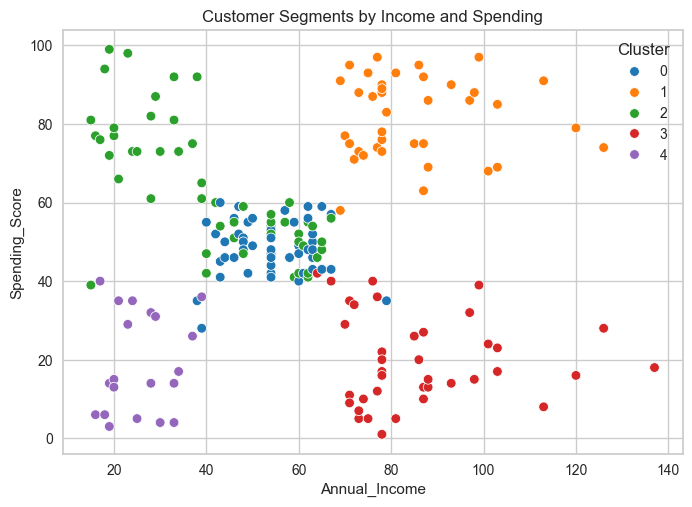

In [110]:

sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='tab10')
plt.title("Customer Segments by Income and Spending")
plt.show()


In [111]:

# Cluster Profiles
df.groupby('Cluster').mean()


,Age,Annual_Income,Spending_Score,GenderCode
Cluster,,,,
0,55.833333,54.062500,48.416667,0.562500
1,32.948718,84.794872,81.487179,0.564103
2,25.075472,41.547170,62.660377,0.566038
3,40.000000,87.100000,19.575000,0.500000
4,44.250000,25.650000,18.950000,0.600000


## 6. 🚀 Deployment


**Goal:** Save the model and output for future use in production systems.

We save the clustered dataset and the trained model.


In [ ]:

import joblib

# Save clustered data
df.to_csv("Mall_Customers_Clustered.csv", index=False)

os.makedirs('./../output', exist_ok=True)
# Save model and scaler
joblib.dump(kmeans, './../output/kmeans_model.pkl')
joblib.dump(scaler, './../output/scaler.pkl')


['./../output/scaler.pkl']

What about inteli code completion because in vs codium I get inline code suggestions that use seems to use AI